# 군집화(Clustering)
- 비지도학습으로 정답없이 특징만 가지고, 보유한 데이터로 모델을 구현

In [45]:
import pandas as pd
df = pd.read_csv('data/student_kmeans.csv')

In [46]:
import warnings
warnings.filterwarnings('ignore')

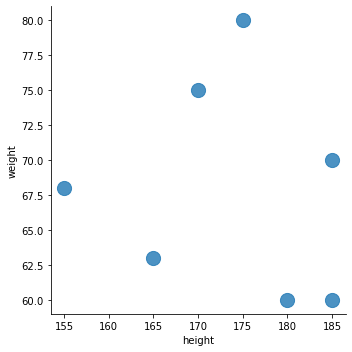

In [47]:
# 데이터 시각화
import matplotlib.pyplot as plt
import seaborn as sns

sns.lmplot(
  'height',
  'weight',
  data=df,
  fit_reg=False,
  scatter_kws={'s': 200}
)
plt.show()

## K-Means 군집화

In [48]:
df.values # array를 출력

array([[185,  60],
       [180,  60],
       [185,  70],
       [165,  63],
       [155,  68],
       [170,  75],
       [175,  80]])

In [49]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3).fit(df.values) # 3개 클러스터로 분류해보겠다


In [50]:
# 각 군집의 중심위치
kmeans.cluster_centers_

array([[160.        ,  65.5       ],
       [183.33333333,  63.33333333],
       [172.5       ,  77.5       ]])

In [51]:
# 분류된 라벨을 저장
df['cluster_id'] = kmeans.labels_
df

,height,weight,cluster_id
0,185,60,1
1,180,60,1
2,185,70,1
3,165,63,0
4,155,68,0
5,170,75,2
6,175,80,2


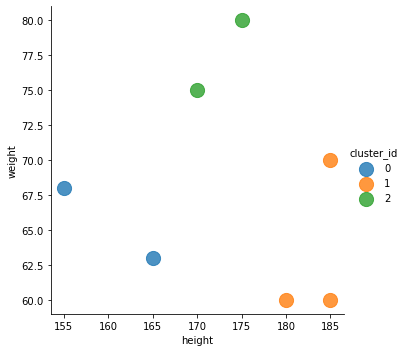

In [52]:
# 시각화
sns.lmplot(
  'height',
  'weight',
  data=df,
  fit_reg=False,
  scatter_kws={'s': 200},
  hue='cluster_id'
)

---
### IRIS 군집화 비교

In [53]:
iris = pd.read_csv('data/iris.csv')
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [54]:
# Name을 숫자로 변환
iris['Label'] = iris['Name'].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})

### K-Means 군집화

In [55]:
iris2 = iris.drop(['Name', 'Label'], axis=1)
iris2.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [56]:
kmeans = KMeans(n_clusters=3).fit(iris2.values)

In [57]:
# 중심점 확인
kmeans.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [58]:
iris['cluster_id'] = kmeans.labels_
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,Label,cluster_id
0,5.1,3.5,1.4,0.2,Iris-setosa,0,1
1,4.9,3.0,1.4,0.2,Iris-setosa,0,1
2,4.7,3.2,1.3,0.2,Iris-setosa,0,1
3,4.6,3.1,1.5,0.2,Iris-setosa,0,1
4,5.0,3.6,1.4,0.2,Iris-setosa,0,1


In [59]:
# Label과 cluster_id 비교
iris.groupby('Label').cluster_id.value_counts()

Label  cluster_id
0      1             50
1      0             48
       2              2
2      2             36
       0             14
Name: cluster_id, dtype: int64

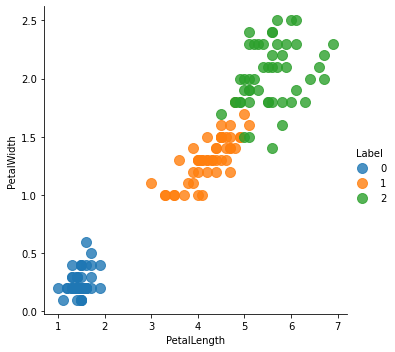

In [60]:
# 시각화
sns.lmplot(
  'PetalLength',
  'PetalWidth',
  data=iris,
  fit_reg=False,
  scatter_kws={'s': 100},
  hue='Label'
)
plt.show()

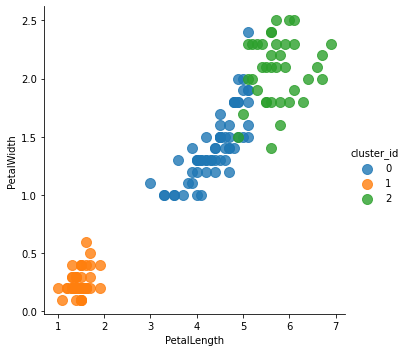

In [61]:
# 시각화
sns.lmplot(
  'PetalLength',
  'PetalWidth',
  data=iris,
  fit_reg=False,
  scatter_kws={'s': 100},
  hue='cluster_id'
)
plt.show()

In [62]:
 # cluster_id: 0 -> 1, 1 -> 0, 2 -> 2
iris['cluster_id'] = iris['cluster_id'].map({0: 1, 1: 0, 2: 2})

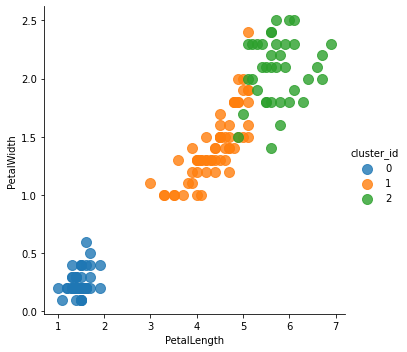

In [63]:
# 시각화
sns.lmplot(
  'PetalLength',
  'PetalWidth',
  data=iris,
  fit_reg=False,
  scatter_kws={'s': 100},
  hue='cluster_id'
)
plt.show()

In [66]:
from sklearn.metrics import accuracy_score
accuracy_score(iris['Label'], iris['cluster_id'])


0.8933333333333333